# 📦 Amazon Product Review Sentiment Analysis
End-to-end ML pipeline for binary classification using TF-IDF 

In [31]:
#Load and Prepare
import pandas as pd

# Load the dataset
df = pd.read_csv('amazon.csv')

# Keep only needed columns
df = df[['reviews.text', 'reviews.doRecommend']]
df.dropna(subset=['reviews.text', 'reviews.doRecommend'], inplace=True)

# Convert target to numeric labels (True -> 1, False -> 0)
df['label'] = df['reviews.doRecommend'].astype(int)
df.head()


,reviews.text,reviews.doRecommend,label
855,Look at this product as a portable speaker fir...,True,1
856,This Amazon tap is not only a great Bluetooth ...,True,1
857,Bought this on Deal of the Day which surprised...,True,1
858,Amazing Sound! All around great product! Nothi...,True,1
859,I have owned the Echo for about a year now and...,True,1


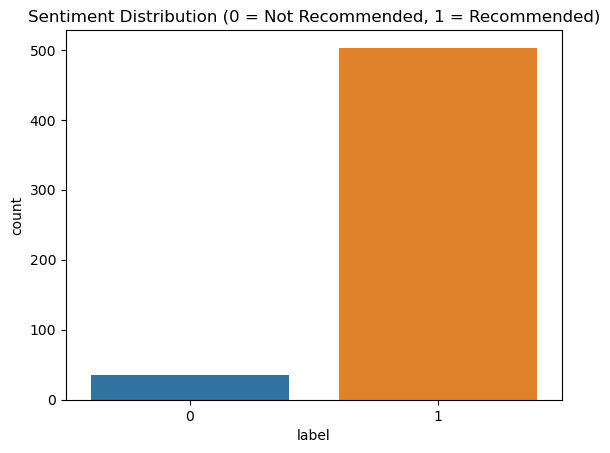

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label', data=df)
plt.title("Sentiment Distribution (0 = Not Recommended, 1 = Recommended)")
plt.show()


In [33]:
#Clean the Text
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords.words('english')]
    return " ".join(tokens)

df['cleaned_text'] = df['reviews.text'].apply(clean_text)
df[['reviews.text', 'cleaned_text']].head()


,reviews.text,cleaned_text
855,Look at this product as a portable speaker fir...,look product portable speaker first echo repla...
856,This Amazon tap is not only a great Bluetooth ...,amazon tap great bluetooth speaker half reason...
857,Bought this on Deal of the Day which surprised...,bought deal day surprised since new best buy p...
858,Amazing Sound! All around great product! Nothi...,amazing sound around great product nothing neg...
859,I have owned the Echo for about a year now and...,owned echo year enjoy feature provides althoug...


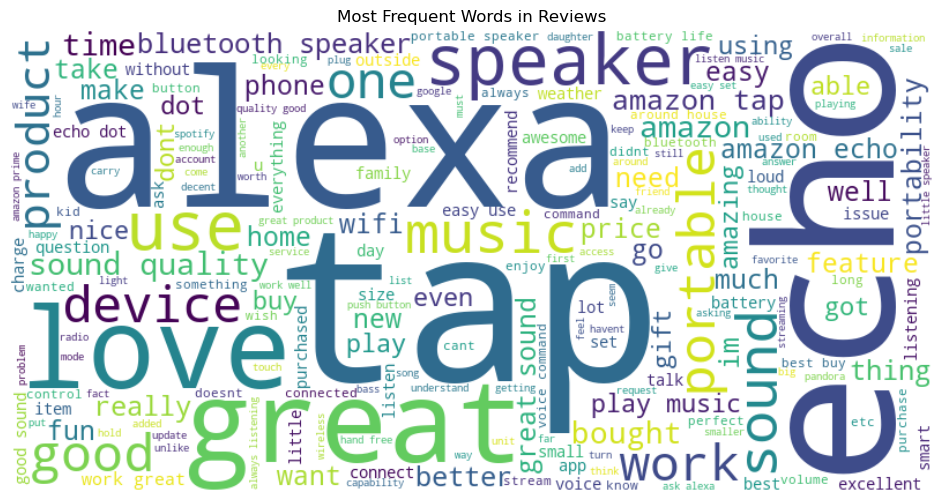

In [34]:
from wordcloud import WordCloud

text = " ".join(df['cleaned_text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Reviews")
plt.show()


In [35]:
#top word by sentiment
from collections import Counter

def get_top_words(corpus, n=20):
    words = " ".join(corpus).split()
    return Counter(words).most_common(n)

# Top 20 words in positive and negative reviews
pos_words = get_top_words(df[df['label']==1]['cleaned_text'])
neg_words = get_top_words(df[df['label']==0]['cleaned_text'])

# Convert to DataFrame
pd.DataFrame({'Positive': dict(pos_words), 'Negative': dict(neg_words)})


,Positive,Negative
tap,227.0,19.0
great,221.0,9.0
speaker,188.0,15.0
sound,188.0,9.0
echo,186.0,20.0
alexa,160.0,8.0
love,145.0,NaN
music,139.0,9.0
amazon,138.0,7.0
use,129.0,8.0


In [36]:
# TF-IDF Vectorization

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_text'])
y = df['label']

In [37]:
#Train Model

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [38]:
# TF-IDF Feature Importance
#If you’re using a linear model like Logistic Regression:

# Get feature names and coefficients
feature_names = tfidf.get_feature_names_out()
coefs = model.coef_[0]

# Top 10 positive/negative words
top_pos = np.argsort(coefs)[-10:]
top_neg = np.argsort(coefs)[:10]

print("Top Positive Words:")
print([feature_names[i] for i in top_pos])

print("\nTop Negative Words:")
print([feature_names[i] for i in top_neg])


Top Positive Words:
['house', 'portability', 'around', 'little', 'nice', 'play', 'easy', 'good', 'love', 'great']

Top Negative Words:
['terrible', 'dot', 'dont', 'one', 'link', 'wouldnt', 'voice', 'press', 'app', 'phone']


In [39]:
#Evaluate

from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.33      0.11      0.17         9
           1       0.94      0.98      0.96       126

    accuracy                           0.93       135
   macro avg       0.64      0.55      0.56       135
weighted avg       0.90      0.93      0.91       135

[[  1   8]
 [  2 124]]


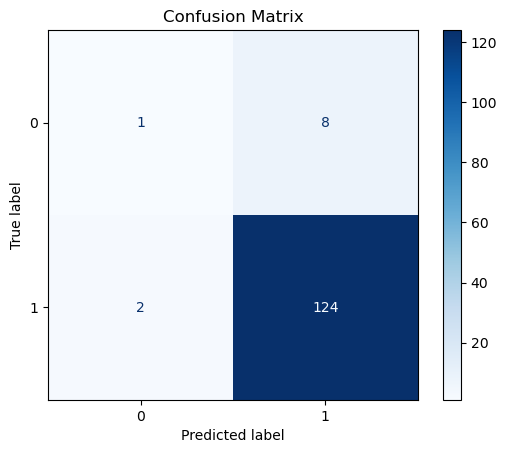

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# ML models

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# 1. Load data and prepare
df = pd.read_csv("amazon.csv")
df = df[['reviews.text', 'reviews.doRecommend']].dropna()
df['label'] = df['reviews.doRecommend'].astype(int)

# 2. Clean the text
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    return " ".join([lemmatizer.lemmatize(word) for word in tokens if word not in stopwords.words('english')])

df['cleaned_text'] = df['reviews.text'].apply(clean_text)

# 3. TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['label']

# 4. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# 5. Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Naive Bayes": MultinomialNB(),
    "Linear SVC": LinearSVC(class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "KNN": KNeighborsClassifier()
}

# 6. Train, predict, evaluate
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

# 7. Show as DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Accuracy', ascending=False)
print(results_df)


[nltk_data] Downloading package punkt to
[nltk_data]     /home/9316b2fe-a8d9-44bb-9a86-
[nltk_data]     a1e0d1f932de/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/9316b2fe-a8d9-44bb-9a86-
[nltk_data]     a1e0d1f932de/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/9316b2fe-a8d9-44bb-9a86-
[nltk_data]     a1e0d1f932de/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                 Model  Accuracy  Precision    Recall  F1 Score
2           Linear SVC  0.940741   0.940299  1.000000  0.969231
3        Random Forest  0.933333   0.933333  1.000000  0.965517
1          Naive Bayes  0.933333   0.933333  1.000000  0.965517
4                  KNN  0.933333   0.933333  1.000000  0.965517
0  Logistic Regression  0.925926   0.939394  0.984127  0.961240
